<a href="https://colab.research.google.com/github/aminyG/PCVK_Ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. Make a Gamma Correction according to the following instructions
This experiment will ask you to make a Gamma Correction. In this experiment, the Gamma value will be set by asking for input from the user . Below is the code to request value input from the user. Continue the code by creating an image with gamma correction according to the formula given

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


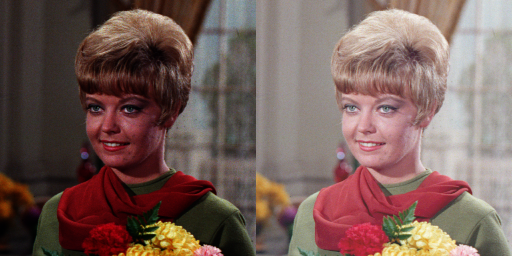

In [4]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/pcvk/photo/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

###2. Create Image Depth Simulation
This experiment is used as a simulation of the image quantization process. In image quantization, pixels can be represented by n-bit depth (default is 8-bit). In an 8-bit pixel, the possible colors are 256 colors, from 0 (0000 0000) to 255 (1111 1111).


On a 7-bit pixel, the possible colors are 128 colors, from 0 (000 0000) to 127 (111 1111). The possible color is obtained from the power of 2 the number of bits. If it is 7 bits, then the number of colors will be 2 7 = 128, etc. Since Visual Studio 2017 only works on 8 bits, this experiment only manipulates colors so that the number of colors matches their depth.

For the 7-bit case, two 8-bit colors are represented by one 7-bit color. Examples of color pixels 0 and 1 at 8-bit, represented by color 0 at 7-bit. color pixels 2 and 3 at 8-bit, represented by color 1 at 7-bit, etc.

 Bit Depth pada Citra 
---------------------------------
Masukkan nilai Bit Depth: 1


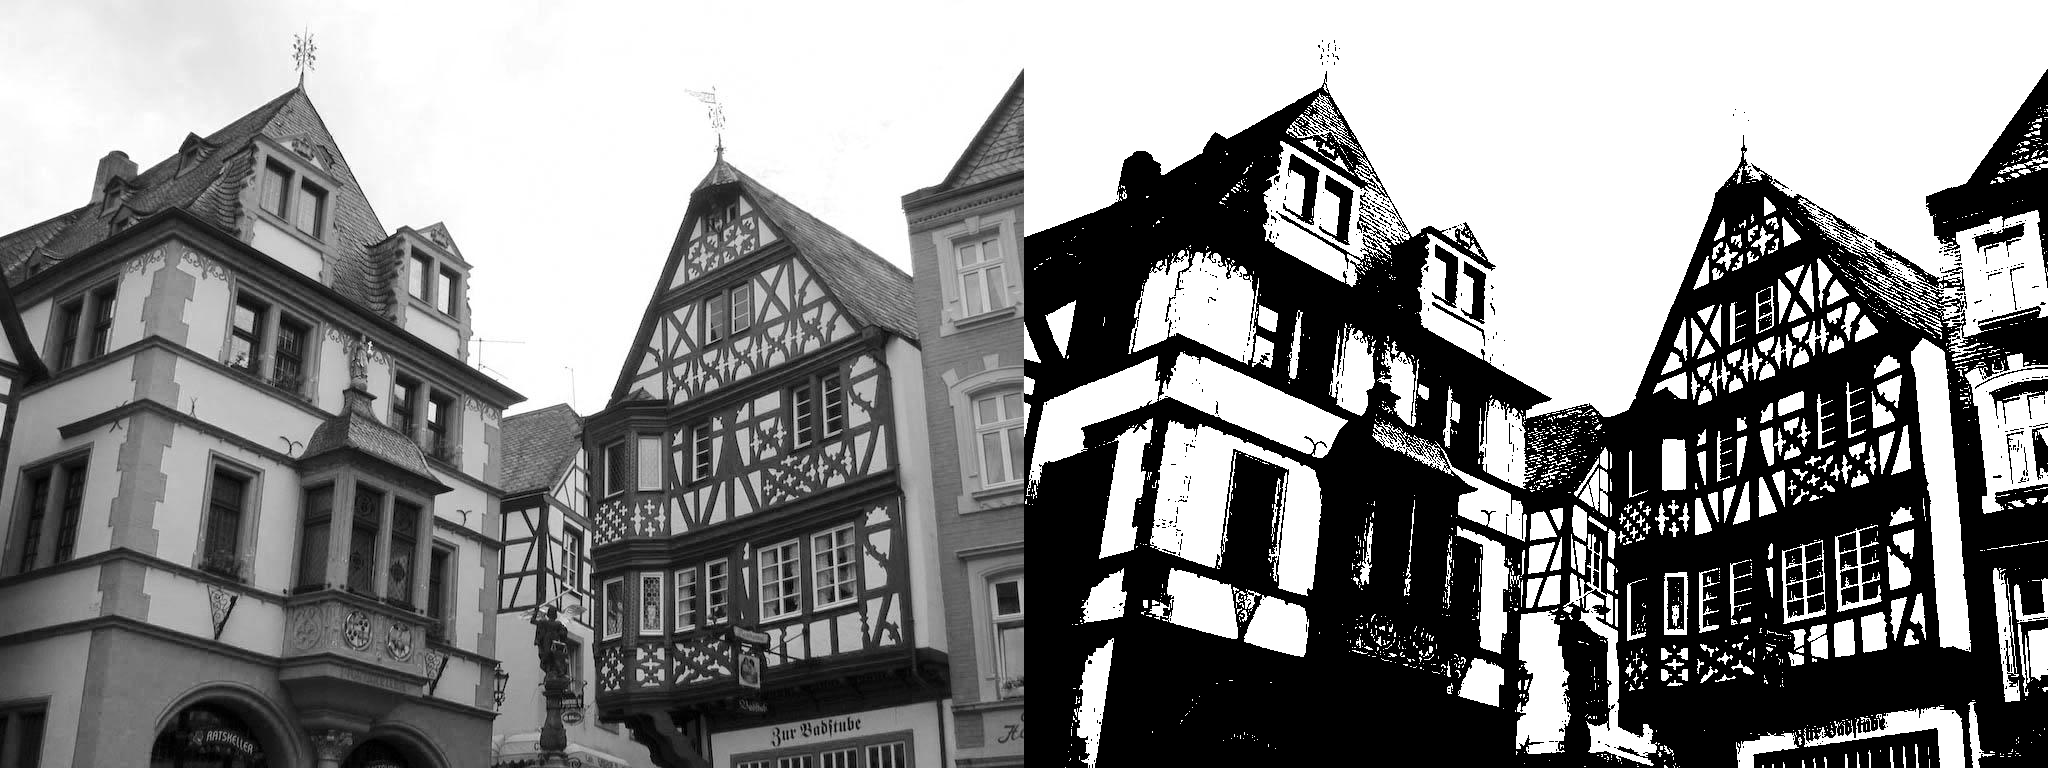

In [5]:
original = cv.imread('/content/drive/MyDrive/pcvk/photo/old_house.jpg')

print(' Bit Depth pada Citra ')
print('---------------------------------')
try:
  bit_depth = int(input('Masukkan nilai Bit Depth: '))
except ValueError:
  print('Error, not a number')

bit = 2**bit_depth
level = 255/(bit-1)

bit_depth_image = np.zeros(original.shape, original.dtype)

#access per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      bit_depth_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255)

final_frame = cv.hconcat((original, bit_depth_image))
cv2_imshow(final_frame)

## 3. Create the Average Denoising module
Create an average denoising module according to the formula given in the previous section.
Original images are provided at /images/galaxy.jpg .
100 Images with Gaussian Noise are provided at /images/noises/*.jpg
You can use the following code to read all the images in one folder, use the glob module ( import glob ).

PSNR value is 27.554336010839183 (dB)


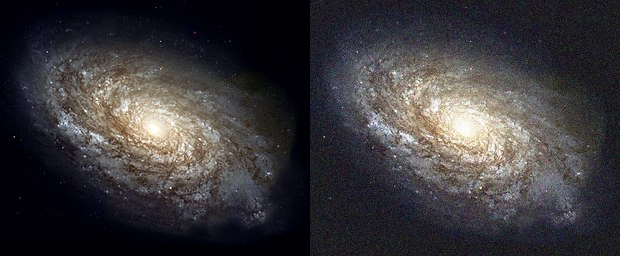

In [10]:
# Number of images in Average 5

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/pcvk/photo/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/pcvk/photo/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # number of the noises folder (array)
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                   # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('PSNR value is',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

PSNR value is 27.531180071749507 (dB)


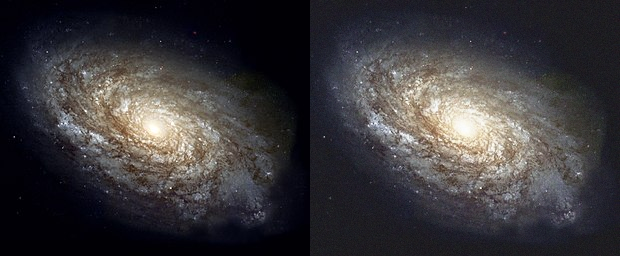

In [12]:
# Number of images in Average 30

dst = cv_img[0]
noise_number = 29
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('PSNR value is',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

PSNR value is 27.499897909800346 (dB)


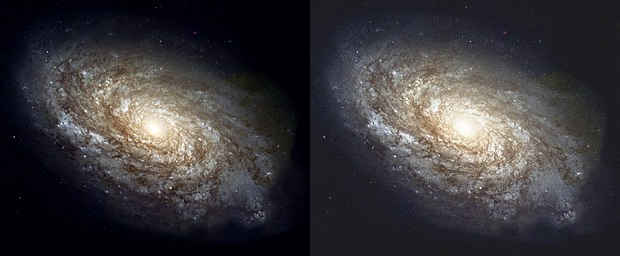

In [14]:
# Number of images in Average 60

dst = cv_img[0]
noise_number = 59
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('PSNR value is',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

PSNR value is 27.507806198789517 (dB)


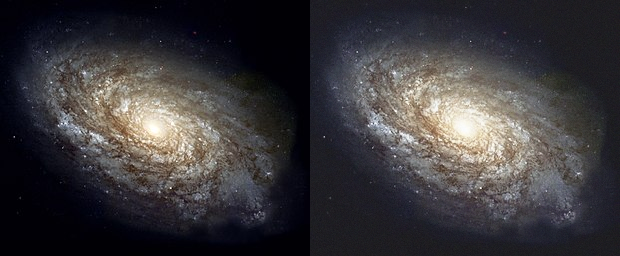

In [16]:
# Number of images in Average 80

dst = cv_img[0]
noise_number = 79
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('PSNR value is',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

PSNR value is 27.508972834301957 (dB)


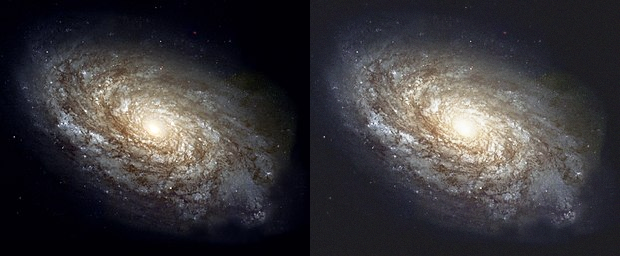

In [18]:
# Number of images in Average 100

dst = cv_img[0]
noise_number = 99
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('PSNR value is',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

From the PSNR results that you recorded in the table above, the conclusion that can be drawn is that the higher the processed image, the lower the PSNR value.

## 4. Create image masking for the following image.
The left image is the original image ( images / teeth.jpg ) , while the right image is the result:

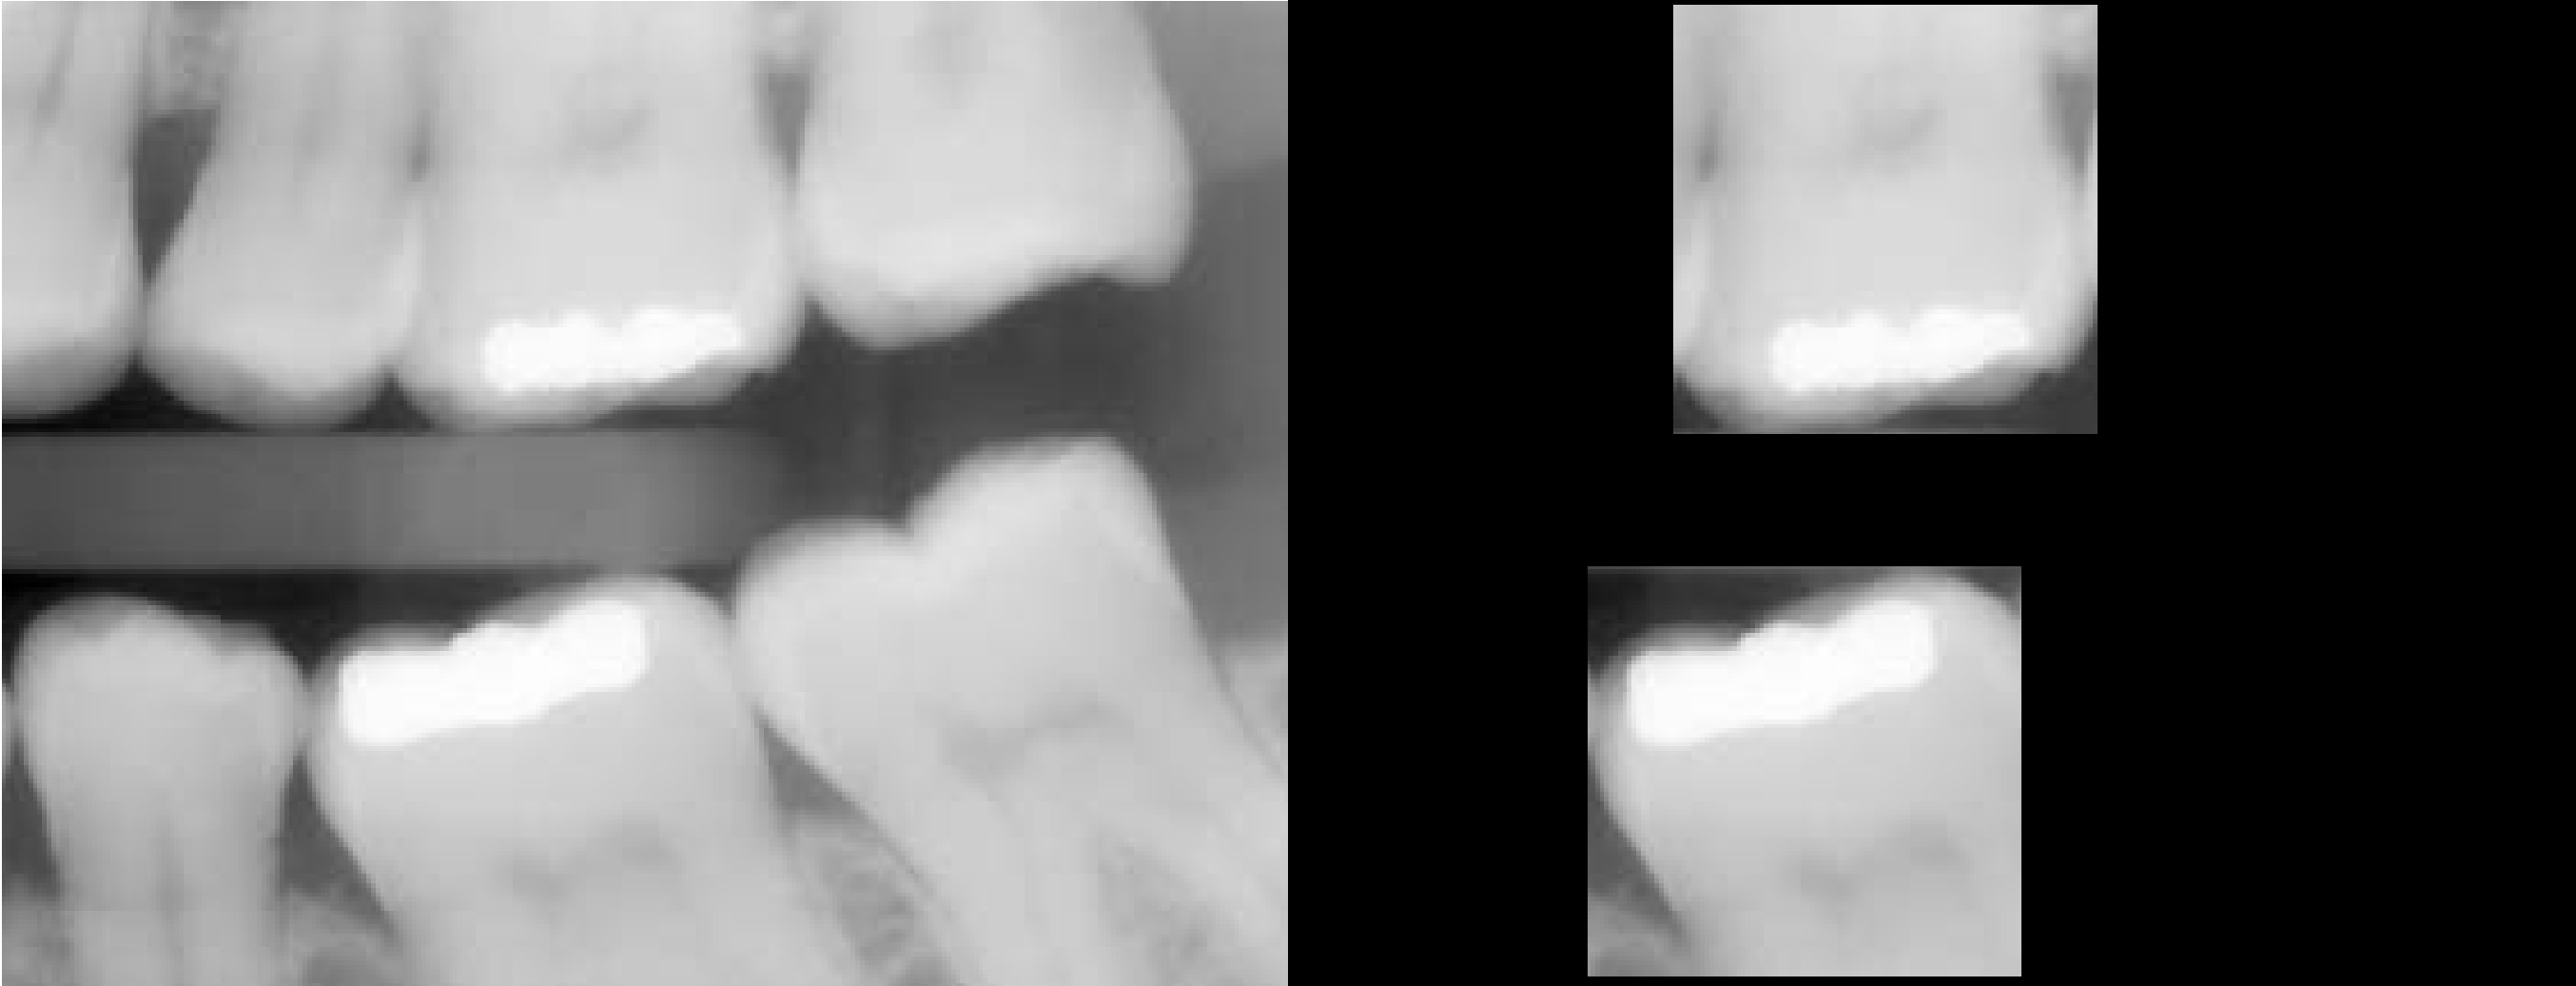

In [20]:
img_t = cv.imread('/content/drive/MyDrive/pcvk/photo/teeth.jpg')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(315,595),pt2=(770,1025),color=(255,255,255),thickness=-1)

result = img_t & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result = img_t & mask1

teeth_frame = cv.hconcat((img_t, result))
cv2_imshow(teeth_frame)

## 5. Do the experiment using other operators and show the results in this module.
Write down the results of your analysis why the output image shown like that.

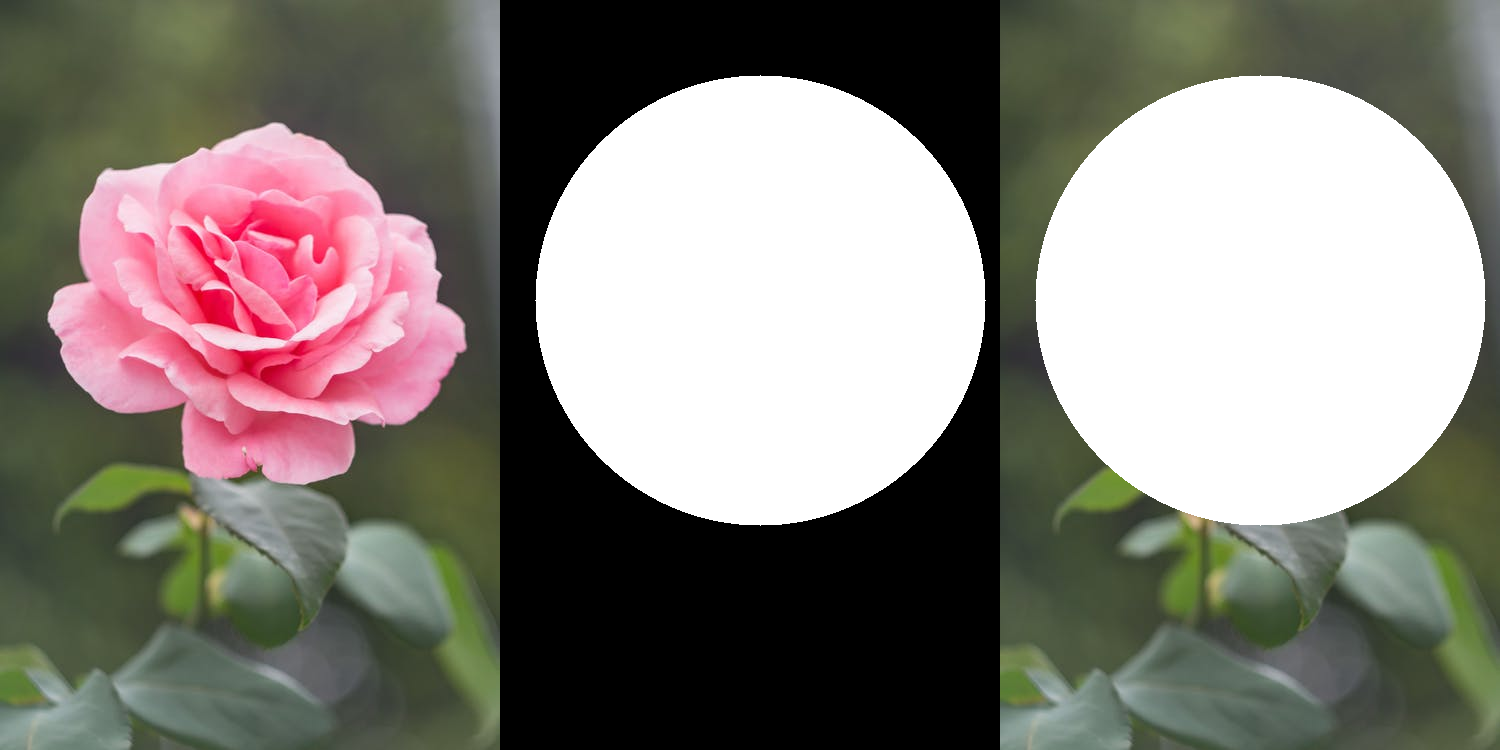

In [22]:
# OR Operator

img_rose = cv.imread('/content/drive/MyDrive/pcvk/photo/rose_pink.png')

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose | mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

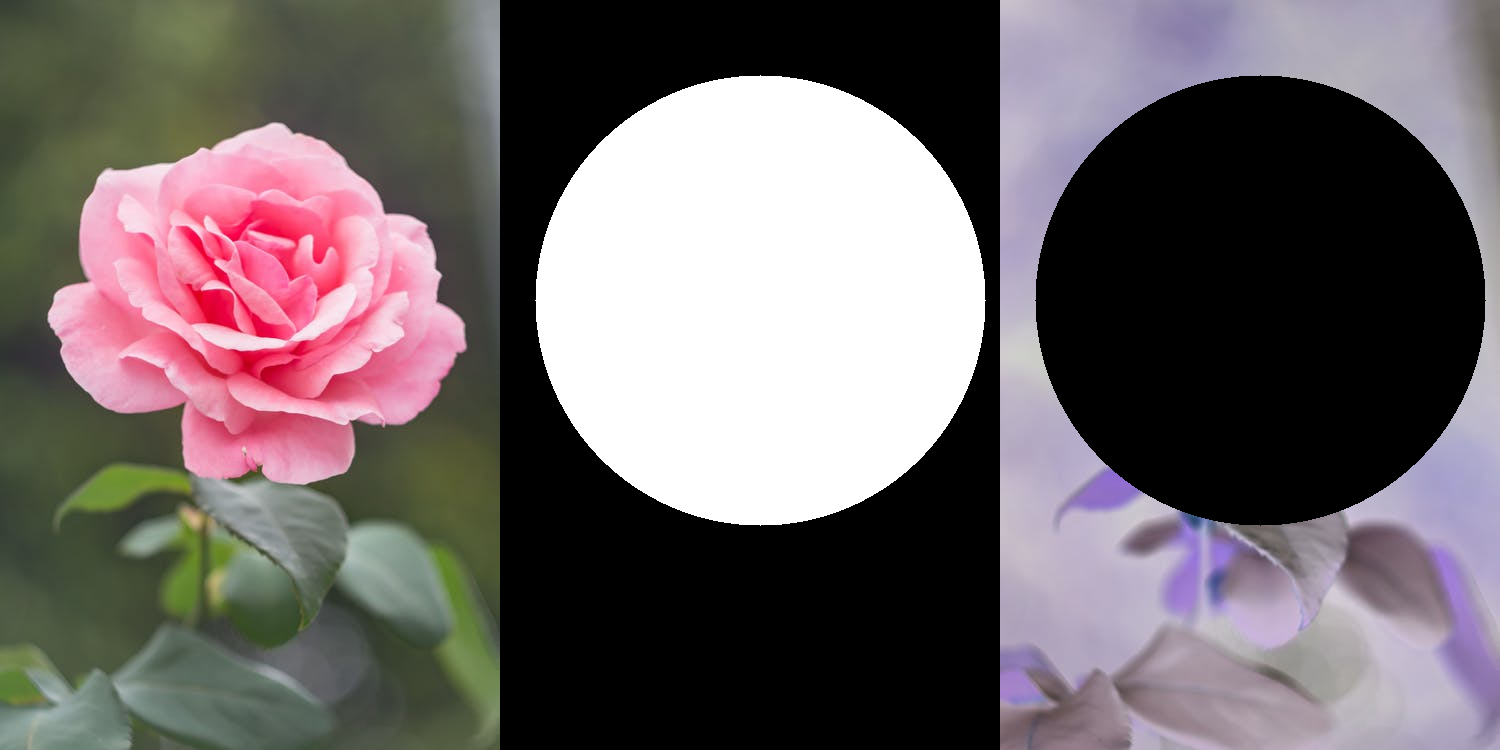

In [23]:
# NOT Operator

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & ~mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

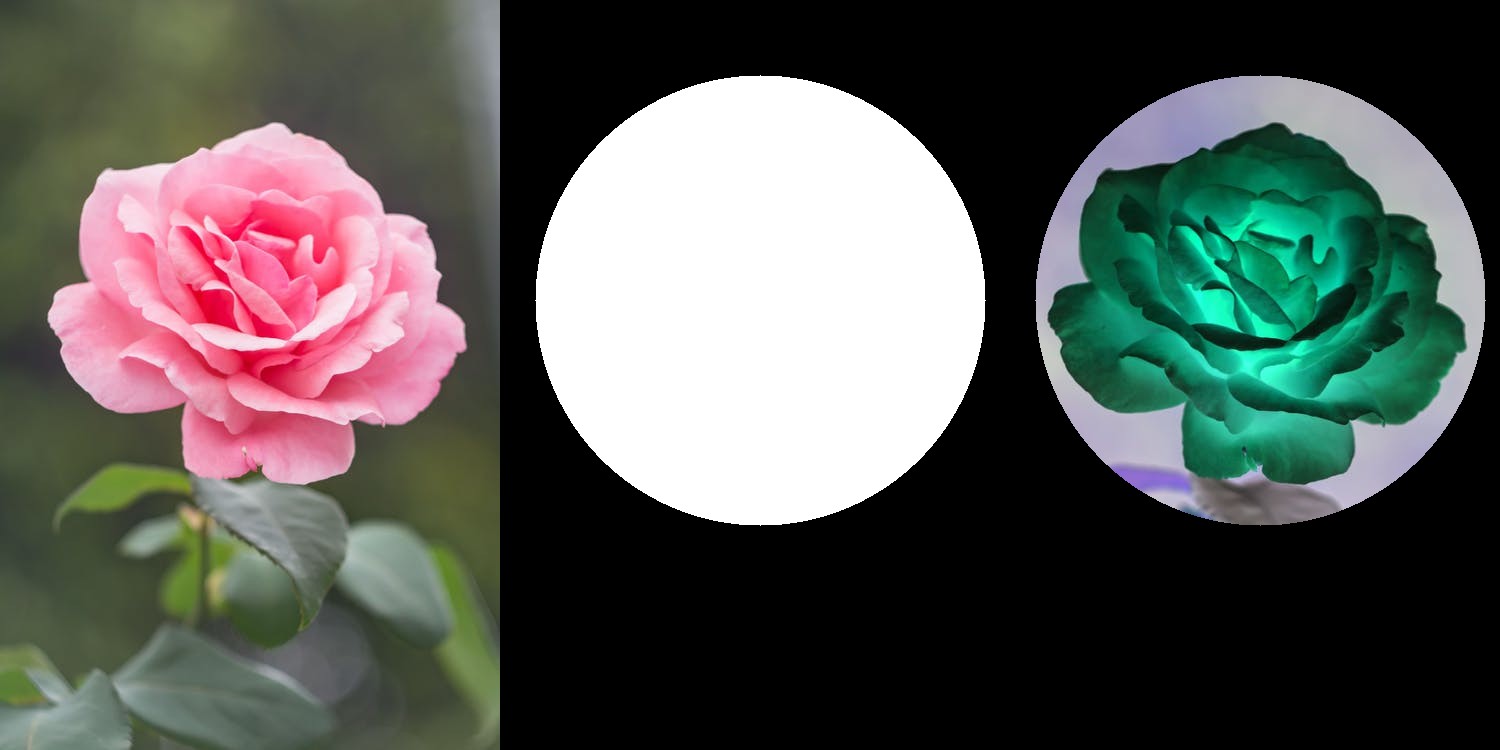

In [24]:
# NAND Operator

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

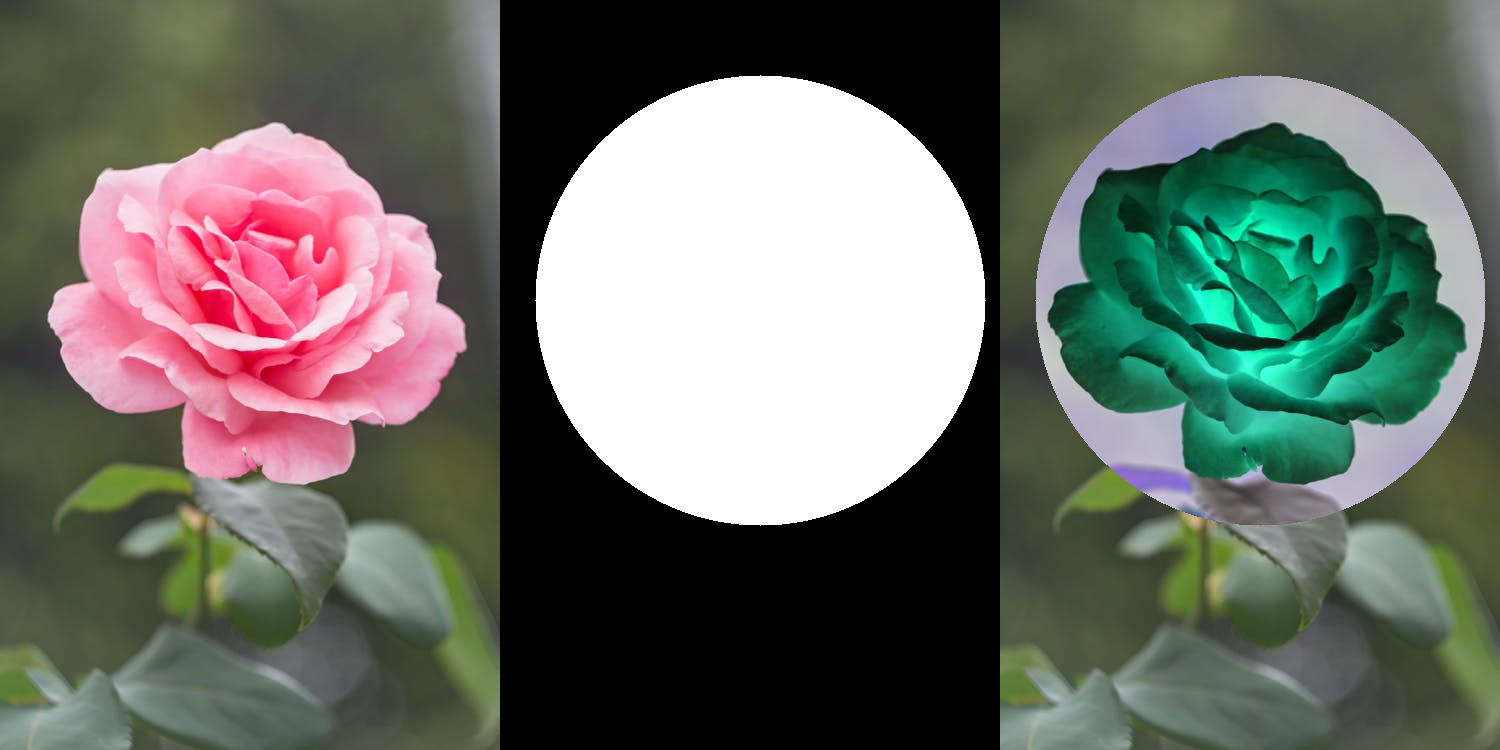

In [25]:
# XOR Operator

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose ^ mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

- OR will add a mask to the image
- NOT will make the image negative
- NAND will add a mask and make the image negative
- XOR will add a mask to the tooth image and make the objects in the mask negative